In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
column_names = [
    'age',      # سن
    'sex',      # جنسیت (1 = مرد، 0 = زن)
    'cp',       # نوع درد قفسه سینه (1-4)
    'trestbps', # فشار خون در حالت استراحت
    'chol',     # کلسترول سرم
    'fbs',      # قند خون ناشتا (> 120 mg/dl)
    'restecg',  # نتایج الکتروکاردیوگرام استراحت
    'thalach',  # حداکثر ضربان قلب
    'exang',    # آنژین ناشی از ورزش
    'oldpeak',  # افسردگی ST ناشی از ورزش
    'slope',    # شیب بخش ST در اوج ورزش
    'ca',       # تعداد عروق اصلی (0-3)
    'thal',     # وضعیت تالاسیمی (3 = نرمال، 6 = نقص ثابت، 7 = نقص برگشت‌پذیر)
    'target'    # وجود بیماری قلبی (0 = سالم، 1-4 = شدت بیماری)
]
heart_data = pd.read_csv(url, names=column_names)
print(heart_data.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [7]:
heart_data = heart_data.replace('?', pd.NA)
print(heart_data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [9]:
for col in heart_data.columns:
    heart_data[col] = pd.to_numeric(heart_data[col], errors='coerce')

heart_data.fillna(heart_data.median(), inplace=True)
print(heart_data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
heart_data['target'] = heart_data['target'].apply(lambda x: 0 if x == 0 else 1)

In [11]:
heart_data.to_csv('cleaned_heart_data.csv', index=False)

In [13]:
data=pd.read_csv('cleaned_heart_data.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
data.sex.value_counts()


sex
1.0    206
0.0     97
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

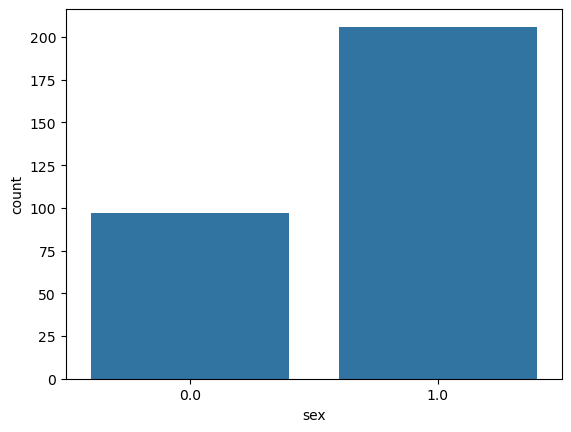

In [22]:
sns.countplot(data=data, x='sex')

In [14]:
data.groupby('sex')['target'].mean()


sex
0.0    0.257732
1.0    0.553398
Name: target, dtype: float64

<Axes: xlabel='target', ylabel='count'>

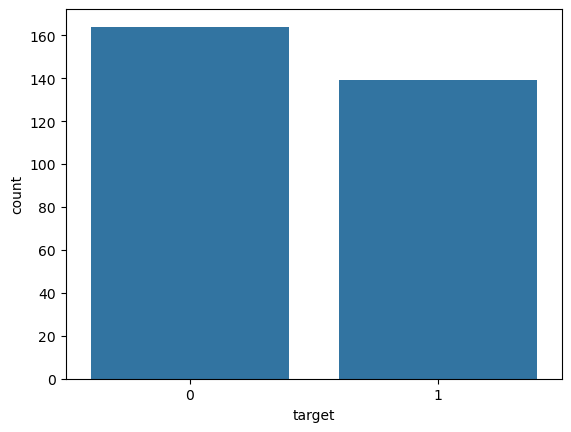

In [19]:
sns.countplot(data=data, x='target')

<Axes: >

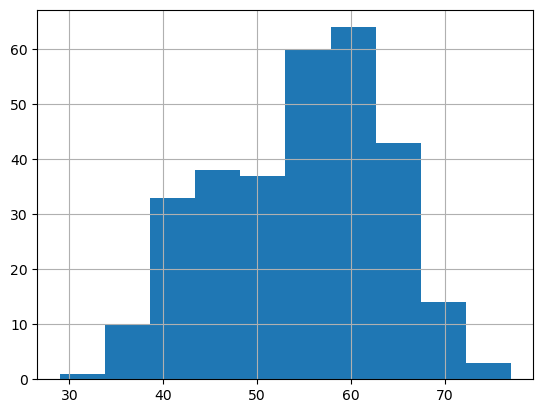

In [26]:
data['age'].hist()

In [27]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=300)

In [31]:
model= KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
from sklearn import metrics

In [35]:
y_pred= model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.60      0.66        43
           1       0.57      0.70      0.63        33

    accuracy                           0.64        76
   macro avg       0.65      0.65      0.64        76
weighted avg       0.66      0.64      0.65        76



In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=300)

In [77]:
model= KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred= model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.60      0.66        43
           1       0.57      0.70      0.63        33

    accuracy                           0.64        76
   macro avg       0.65      0.65      0.64        76
weighted avg       0.66      0.64      0.65        76



#SVM

In [80]:
from sklearn.svm import SVC

In [82]:
clf = SVC(C=15, kernel='linear', random_state=3244)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.79      0.79      0.79        33

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [97]:
params = {
    'C' : [1, 5, 10, 15],
    'kernel' : ['linear'],
    'gamma' : ['auto', 0.1, 0.5]
}
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)


In [98]:
gsh.fit(X, y)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 15], 'gamma': ['auto', 0.1, 0.5],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=10)

In [87]:
gsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [99]:
print("Best estimator:", gsh.best_estimator_)
print("Best parameters:", gsh.best_params_)
print("Best score:", gsh.best_score_)

Best estimator: SVC(C=1, gamma='auto', kernel='linear')
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}
Best score: 0.8316268734750785


In [93]:
params = {
    'C' : [1, 5, 10, 15],
    'kernel' : ['linear'],
    'gamma' : ['auto', 0.1, 0.5]
}
rsh = RandomizedSearchCV(SVC(),param_distributions=params, scoring='accuracy', cv=2, n_jobs=-1, verbose=10)
rsh.fit(X, y)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [1, 5, 10, 15],
                                        'gamma': ['auto', 0.1, 0.5],
                                        'kernel': ['linear']},
                   scoring='accuracy', verbose=10)

In [94]:
rsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [95]:
print("Best estimator:", rsh.best_estimator_)
print("Best parameters:", rsh.best_params_)
print("Best score:", rsh.best_score_)

Best estimator: SVC(C=1, gamma='auto', kernel='linear')
Best parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 1}
Best score: 0.8316268734750785
